In [1]:
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('data.csv')
df = df[df["Y"].between(df.Y.quantile(.15),df.Y.quantile(.85))]
y = pd.DataFrame(df['Y'])
X = df.drop('Y', axis = 1)
bins = np.linspace(y.min()[0],y.max()[0],20)
df = df.reset_index(drop = True)
y = pd.DataFrame(np.digitize(y, bins = bins))
df['Y'] = y

In [4]:
df['Y'].value_counts()

2     831
3     714
1     674
5     584
4     580
6     488
7     470
8     354
9     330
10    281
13    273
11    266
12    215
15    190
14    177
17    155
16    153
18    150
19    111
20      5
Name: Y, dtype: int64

<AxesSubplot:>

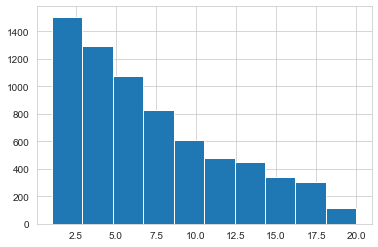

In [5]:
df.Y.hist()

In [6]:
desc = pd.read_excel('data_description.xlsx')

In [7]:
desc_1 = desc[(~(desc.OPIS.str.contains('3')) & (~(desc.OPIS.str.contains('6'))))]
desc_3 = desc[desc.OPIS.str.contains('3')]
desc_3 = pd.concat([desc.iloc[:2], desc_3])
desc_6 = desc[desc.OPIS.str.contains('6')]
desc_6 = pd.concat([desc.iloc[:2], desc_6])

In [8]:
len(desc_1)+len(desc_3)-2+len(desc_6)-2 == len(desc)

True

In [9]:
df_1 = df[df.columns.intersection(list(desc_1.NAZWA))]
df_3 = df[df.columns.intersection(list(desc_3.NAZWA))]
df_6 = df[df.columns.intersection(list(desc_6.NAZWA))]

In [10]:
df_train, df_test = train_test_split(df, train_size = 0.9 , stratify = df['Y'])

In [11]:
X_train = df_train.drop('Y', axis = 1)
y_train = df_train.Y
X_test = df_test.drop('Y', axis = 1)
y_test = df_test.Y

In [12]:
df

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295
0,1,27,0.0,0.0,0.0,0.0,0,0,0,23.4,...,27,48,95,6883.0,21767.1,43137.0,7255.7,2,6,12
1,10,27,0.0,0.0,0.0,0.0,0,0,0,126.8,...,2,8,11,0.0,0.0,0.0,0.0,0,0,0
2,7,34,0.0,0.0,0.0,0.0,0,0,0,280.9,...,5,28,46,7375.3,21832.7,38992.3,7277.6,1,3,6
3,4,39,0.0,0.0,0.0,0.0,0,0,0,0.0,...,14,38,78,4262.5,14908.1,29670.8,4969.4,2,7,13
4,6,38,0.0,0.0,0.0,0.0,0,0,0,0.0,...,4,14,28,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,6,30,0.0,0.0,0.0,0.0,0,0,0,101.0,...,2,7,18,5666.9,25580.1,40805.4,8526.7,1,4,7
6997,1,33,0.0,0.0,0.0,0.0,0,0,0,0.0,...,5,13,19,3805.1,10337.2,25905.8,3445.8,1,3,6
6998,11,33,0.0,0.0,0.0,0.0,0,0,0,0.0,...,13,41,55,9156.8,36284.1,63623.8,12094.7,1,3,6
6999,2,23,0.0,0.0,0.0,0.0,0,0,0,4.5,...,1,6,23,4357.0,12714.0,22976.0,4238.0,1,3,6


In [13]:
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train.values.ravel())
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

The mean squared error (MSE) on test set: 14.6262
0.5261330527399926
0.4072039134877832


In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Wynik dla zestawu uczącego: {:.2f}".format(lr.score(X_train, y_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(lr.score(X_test, y_test)))

Wynik dla zestawu uczącego: 0.28
Wynik dla zestawu testowego: 0.11


In [15]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))

0.4739077574045152
0.2001238288157513


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
# perform a robust scaler transform of the dataset
trans = StandardScaler()
X_train_t = trans.fit_transform(X_train)
X_test_t = trans.transform(X_test)
 
scaler = MinMaxScaler()
X_train_t = pd.DataFrame(scaler.fit_transform(X_train_t), columns=X_train.columns)
X_test_t = pd.DataFrame(scaler.transform(X_test_t), columns=X_train.columns)

In [17]:
from sklearn.feature_selection import SelectKBest, chi2
 
chi_best_k = SelectKBest(chi2, k=10).fit((10*X_train).astype(int), y_train) #(10*X_train).astype(int)


In [45]:
chi_best_k = SelectKBest(chi2, k=50).fit((10*X_train).astype(int), y_train) #(10*X_train).astype(int)

chi_best_feats = []
for i in range(len(list(chi_best_k.get_support()))):
    if list(chi_best_k.get_support())[i] == True:
        chi_best_feats.append(list(X_train.columns)[i])


desc_best_feats = desc.loc[desc['NAZWA'].isin(chi_best_feats)]
desc_best_feats.to_excel('best_feats.xlsx')
desc_3b = desc_best_feats[desc_best_feats.OPIS.str.contains('3')]
desc_6b = desc_best_feats[desc_best_feats.OPIS.str.contains('6')]

In [41]:
desc_best_feats

,NAZWA,OPIS
3,X3,Sumaryczna kwota wydatków klienta związanych z...
4,X4,Sumaryczna kwota wydatków klienta związanych z...
16,X16,Sumaryczna kwota transakcji w bankomatach w os...
17,X17,Sumaryczna kwota transakcji w bankomatach w 3 ...
18,X18,Sumaryczna kwota transakcji w bankomatach w 6 ...
19,X19,Średnia kwota transakcji w bankomatach w 3 ost...
23,X23,Sumaryczna kwota wydatków klienta w ostatnim p...
24,X24,Sumaryczna kwota wydatków klienta w 3 ostatnic...
25,X25,Sumaryczna kwota wydatków klienta w w 6 ostatn...
26,X26,Średnia kwota wydatków klienta w 3 ostatnich m...


In [57]:
print(f'number of features: {len(desc_best_feats)}')
print(f'6 months perspective: {len(desc_6b)}')
print(f'3 months perspective: {len(desc_3b)}')
print(f'1 month perspective: {len(desc_best_feats)-len(desc_3b)-len(desc_6b)}')

number of features: 50
6 months perspective: 19
3 months perspective: 22
1 month perspective: 9


In [19]:
df_chi = df[df.columns.intersection(list(desc_3b.NAZWA))]
df_chi.reset_index(drop = True)
df_chi['Y'] = y

<ipython-input-19-b42a6c550f50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi['Y'] = y


In [20]:
df_chi_train, df_chi_test = train_test_split(df_chi, train_size = 0.9 , stratify = df_chi['Y'])

In [21]:
X_chi_train = df_chi_train.drop('Y', axis = 1)

X_chi_test = df_chi_test.drop('Y', axis = 1)

y_chi_train = df_chi_train.Y

y_chi_test = df_chi_test.Y

In [22]:
X_chi_train

,X3,X17,X19,X24,X26,X31,X33,X38,X150,X164,...,X220,X234,X255,X257,X269,X276,X283,X285,X290,X292
6481,0.0,0.0,0.0,124.6,124.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7457.0,7457.0,4257.0,4257.0
2821,0.0,0.0,0.0,32590.6,10863.5,0.0,0.0,0.0,1101.6,0.0,...,1168.3,0.0,0.0,0.0,0.0,0.0,31294.2,10431.4,18021.7,6007.2
4352,0.0,0.0,0.0,15881.8,5294.0,0.0,0.0,0.0,903.2,0.0,...,189.0,0.0,0.0,0.0,0.0,0.0,3439.6,1146.5,0.0,0.0
6462,0.0,0.0,0.0,88146.5,29382.2,0.0,0.0,0.0,101.5,0.0,...,176.7,0.0,0.0,0.0,0.0,0.0,2402.0,800.7,0.0,0.0
4469,0.0,11150.0,3716.7,32456.5,10818.8,1000.0,333.3,0.0,206.5,0.0,...,383.7,0.0,0.0,0.0,0.0,0.0,26134.0,8711.3,12000.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,0.0,350.0,116.7,9681.1,3227.0,0.0,0.0,0.0,145.0,0.0,...,530.0,0.0,0.0,0.0,0.0,0.0,8750.0,2916.7,0.0,0.0
4688,0.0,0.0,0.0,9090.0,3030.0,0.0,0.0,0.0,275.5,0.0,...,184.6,0.0,0.0,0.0,0.0,0.0,42006.9,14002.3,9901.3,3300.4
5839,0.0,0.0,0.0,190000.0,63333.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,223136.0,74378.7,0.0,0.0
5012,0.0,0.0,0.0,1599.5,533.2,0.0,0.0,0.0,0.0,0.0,...,377.1,0.0,0.0,0.0,0.0,0.0,1692.1,564.0,0.0,0.0


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_chi_train, y_chi_train)
print("Wynik dla zestawu uczącego: {:.2f}".format(lr.score(X_chi_train, y_chi_train)))
print("Wynik dla zestawu testowego: {:.2f}".format(lr.score(X_chi_test, y_chi_test)))

Wynik dla zestawu uczącego: 0.09
Wynik dla zestawu testowego: 0.07


In [24]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_chi_train, y_chi_train)
print(reg.score(X_chi_train, y_chi_train))
print(reg.score(X_chi_test, y_chi_test))

0.4836114146377378
0.2159032205917285


In [25]:
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_chi_train, y_chi_train.values.ravel())
mse = mean_squared_error(y_chi_test, reg.predict(X_chi_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(reg.score(X_chi_train, y_chi_train))
print(reg.score(X_chi_test, y_chi_test))

The mean squared error (MSE) on test set: 16.0059
0.40106890800239703
0.3512846079745121


In [26]:
mse_list = []
train = []
test = []
for i in range(10,100):
    chi_best_k = SelectKBest(chi2, k=i).fit((10*X_train).astype(int), y_train) #(10*X_train).astype(int)

    chi_best_feats = []
    for i in range(len(list(chi_best_k.get_support()))):
        if list(chi_best_k.get_support())[i] == True:
            chi_best_feats.append(list(X_train.columns)[i])


    desc_best_feats = desc.loc[desc['NAZWA'].isin(chi_best_feats)]
    desc_best_feats.to_excel('best_feats.xlsx')
    desc_3b = desc_best_feats[desc_best_feats.OPIS.str.contains('3')]

    df_chi = df[df.columns.intersection(list(desc_3b.NAZWA))]
    df_chi.reset_index(drop = True)
    df_chi['Y'] = y

    df_chi_train, df_chi_test = train_test_split(df_chi, train_size = 0.9 , stratify = df_chi['Y'])

    X_chi_train = df_chi_train.drop('Y', axis = 1)
    X_chi_test = df_chi_test.drop('Y', axis = 1)
    y_chi_train = df_chi_train.Y
    y_chi_test = df_chi_test.Y

    reg = ensemble.GradientBoostingRegressor()
    reg.fit(X_chi_train, y_chi_train.values.ravel())
    mse = mean_squared_error(y_chi_test, reg.predict(X_chi_test))
    mse_list.append(mse)
    train.append(reg.score(X_chi_train, y_chi_train))
    test.append(reg.score(X_chi_test, y_chi_test))


<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi['Y'] = y
<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi['Y'] = y
<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi['Y'] = y
<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi['Y'] = y
<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi['Y'] = y
<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi['Y'] = y
<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi['Y'] = y
<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi['Y'] = y
<ipython-input-26-25577bd53b77>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [27]:
evaluation = pd.DataFrame(list(zip(train, test)),
               columns =['train', 'test'])

<AxesSubplot:>

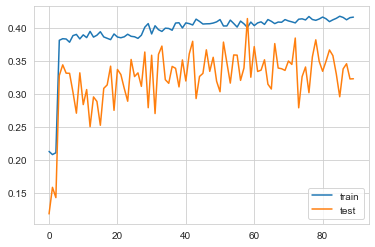

In [28]:
evaluation.plot()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_chi_train)
X_chi_train_scaled = scaler.transform(X_chi_train)
X_chi_test_scaled = scaler.transform(X_chi_test)

In [30]:
X_chi_train_scaled.shape

(6300, 47)

In [31]:
model = Sequential()
model.add(Dense(128, input_dim = 19, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,881
Trainable params: 10,881
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(X_chi_train_scaled, y_chi_train, validation_split = 0.2, epochs = 100)

Epoch 1/100


ValueError: in user code:

    /home/qba/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/qba/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/qba/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/qba/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/qba/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/qba/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /home/qba/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /home/qba/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/qba/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 19 but received input with shape (None, 47)


In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


NameError: name 'history' is not defined

In [ ]:
predictions = model.predict(X_chi_train_scaled)
predictions.astype('int')

In [ ]:
plt.scatter(y_chi_train, predictions.astype('int'))

In [ ]:
mse_neural, mae_neural = model.evaluate(X_chi_test_scaled, y_chi_test)

In [ ]:
mse_neural

In [ ]:
mae_neural